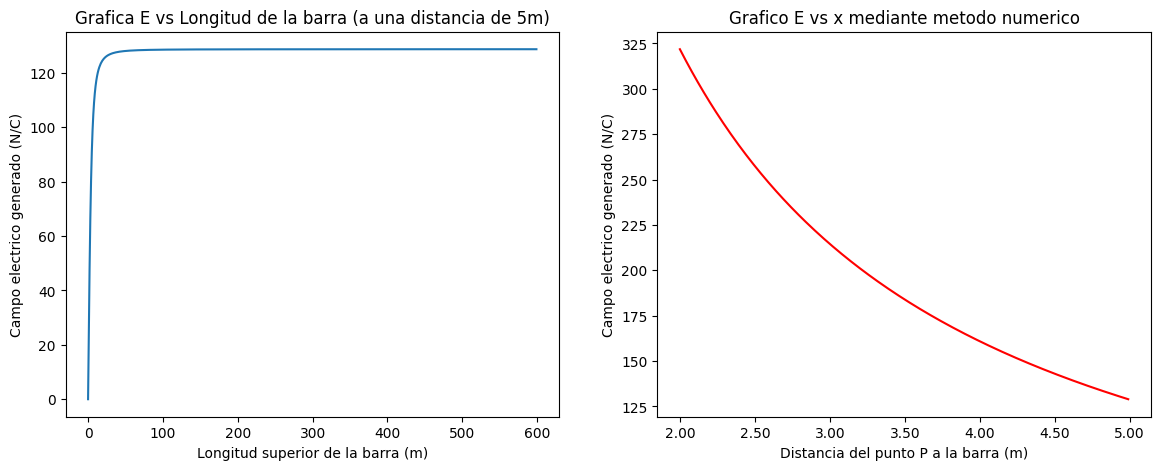

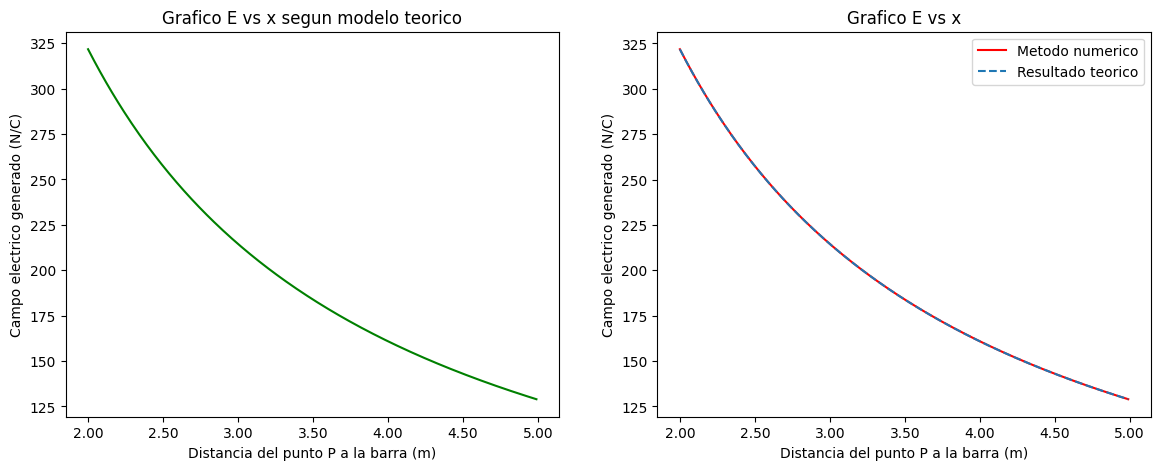

In [46]:
#Simulacion de campo electrico generado por una barra infinita para un punto P
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import pi, epsilon_0
import matplotlib.ticker as ticker
import sympy as sp
k=1/(4*pi*epsilon_0)
#Parametros:
dens_lin=35.8 #nC/m
#DETALLE DE LA SOLUCION
#Se sabe que para cada dq en la barra, se generará un dE de la forma:
#dE=k(dq)/r^2 * r (Vector unitario que determina la direccion del campo)
#E=Integral (k(dq)/r^2) r
#El problema propone solucionar esta integral por el metodo del trapecio, es decir, hay que considerar un pequeñas cargas de tienen carga △q,
#de tal forma que △q sea lo mas pequeño posible y que la cantidad de △q que aparezca en la barra debe ser lo más inmenso posible. Y para hallar
#el campo electrico total sería necesario hallar la sumatoria de todos los campos generados por los △q.
#El campo electrico al ser un vector, no basta con sumar los modulos para tener el resultado total, para el presente caso es necesario descomponer
#cada △E, por lo que para cada △q queda un △Ex y un △Ey. Al encontrar una simetría en la barra, las componentes verticales eventualmente
#se anularán con su △q simétrico, por lo tanto, el campo resultante será paralelo al eje x y solo se tendria que sumar los modulos
#de la componente △Ex de los campos generados.
#△Ex=k(△q)/r^2 *cos(θi)* î (vector horizontal), θi: Angulo de inclinacion al trazar del punto P hasta △q
#△E=△Ex+△Ey
#△E=△Ex
#E=Σk(△q)/r^2*cos(θi) î
#E=Σk(△y*λ)/r^2*cos(θi) î, Se podria considerar solo la parte superior y multiplicarla x2:
#E=2*λ*kΣ(△y)/r^2*cos(θi) î, (Sumatoria de i=0 a n)
#E=2*λ*k*△y*Σcos(θi)/(x^2+(△y*i)^2) î, (Sumatoria de i=0 a n)
#E=2*λ*k*△y*Σx/(x^2+(△y*i)^2)^(3/2) î, (Sumatoria de i=0 a n)
#E=2*λ*k*△y*x*Σ1/(x^2+(△y*i)^2)^(3/2) î, (Sumatoria de i=0 a n)
#Funcion que permite hallar el campo electrico para una barra cuya mitad superior mide L
def encontrar_suma_desde_p (L, x):
    num_term=1000000
    dy=L/num_term
    n=np.arange(num_term)
    arr=1/np.power(np.power(x,2)+np.power(dy*n,2),3/2)
    suma = np.sum(arr)
    suma=suma*2*dens_lin*x*dy*k*pow(10, -9)
    return suma
def valor_teorico(x):
    return dens_lin*pow(10, -9)/(2*x*pi*epsilon_0)

funcion_vectorizada = np.vectorize(encontrar_suma_desde_p)
funcion_vectorizada_2 = np.vectorize(valor_teorico)

#Para barras cada vez mas grandes, el valor del campo empieza a converger a cierto valor si usamos un dy lo suficientemente pequeño
eje_x=np.arange(600) #Valores de la longitud L
eje_y=funcion_vectorizada(eje_x, 5)
eje_x2=np.arange(2,5,0.01)
eje_y2=funcion_vectorizada(600, eje_x2)
eje_y3=funcion_vectorizada_2(eje_x2)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14, 5))
#Se agregara un grafico extra al solicitado para mostrar que a medida que la barra es mas larga, el valor del campo
#electrico no se dispara, sino que la sumatoria calculada anteriormente se va acercando hacia un valor
#Se eligira para temas de calculo, una longitud de barra de 600 para que mi computadora no muera en el intento :s
#Como se ve en el grafico 1, no es un mal valor porque se ve que la grafica ya va llegando a su tope
ax1.plot(eje_x, eje_y)
ax1.set(xlabel='Longitud superior de la barra (m)', ylabel='Campo electrico generado (N/C)',
       title='Grafica E vs Longitud de la barra (a una distancia de 5m)')
ax2.plot(eje_x2, eje_y2, color='red')
ax2.set(xlabel='Distancia del punto P a la barra (m)', ylabel='Campo electrico generado (N/C)',
       title='Grafico E vs x mediante metodo numerico')
decimal_formatter = ticker.FormatStrFormatter("%.2f")
ax2.xaxis.set_major_formatter(decimal_formatter)
fig, (ax3,ax4) = plt.subplots(1,2, figsize=(14, 5))
ax3.plot(eje_x2, eje_y3, color='green')
ax3.set(xlabel='Distancia del punto P a la barra (m)', ylabel='Campo electrico generado (N/C)',
       title='Grafico E vs x segun modelo teorico')
decimal_formatter = ticker.FormatStrFormatter("%.2f")
ax3.xaxis.set_major_formatter(decimal_formatter)
ax4.plot(eje_x2, eje_y2, linestyle='-', color='red')
ax4.plot(eje_x2, eje_y3, linestyle='--')
ax4.set(xlabel='Distancia del punto P a la barra (m)', ylabel='Campo electrico generado (N/C)',
       title='Grafico E vs x')
decimal_formatter = ticker.FormatStrFormatter("%.2f")
ax4.xaxis.set_major_formatter(decimal_formatter)
ax4.legend(['Metodo numerico', 'Resultado teorico'])
plt.show()

